In [1]:
from pyspark import SparkContext

In [2]:
import pandas

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("big data").config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [4]:
df2 = spark.read.option("header",True).csv('/home/usharaff/Downloads/202110-capitalbikeshare-tripdata.csv')

In [5]:
df1 = spark.read.option("header",True).csv('/home/usharaff/Downloads/202101-capitalbikeshare-tripdata.csv')


In [6]:
print("number of rows in data from Jan 2021",df1.count(),"\nnumber of rows in data from Jan 2021",df2.count())

number of rows in data from Jan 2021 100070 
number of rows in data from Jan 2021 328300


In [7]:
df1.columns

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [8]:
df1=df1.select('rideable_type','start_station_name','end_station_name','member_casual')
df2=df2.select('rideable_type','start_station_name','end_station_name','member_casual')

In [9]:
df1=df1.na.drop()
df2=df2.na.drop()


In [10]:
print("number of rows in data from Jan 2021",df1.count(),"\nnumber of rows in data from Jan 2021",df2.count())

number of rows in data from Jan 2021 85219 
number of rows in data from Jan 2021 303533


+-------------+-----+
|member_casual|count|
+-------------+-----+
|       casual|26859|
|       member|58360|
+-------------+-----+



<AxesSubplot:xlabel='member_casual'>

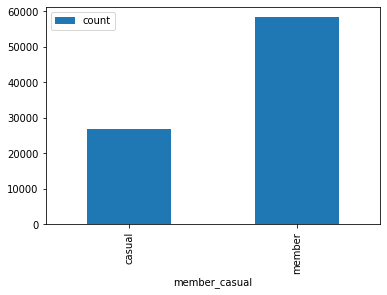

In [11]:
a=df1.groupBy("member_casual").count()
a.show()
a.toPandas().plot.bar(x="member_casual", y="count")



+-------------+------+
|member_casual| count|
+-------------+------+
|       casual|114553|
|       member|188980|
+-------------+------+



<AxesSubplot:xlabel='member_casual'>

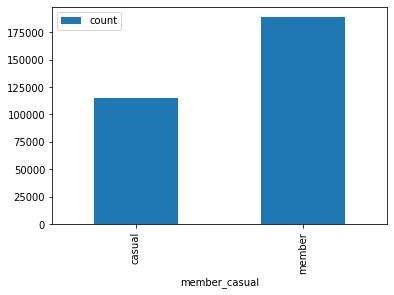

In [12]:
b=df2.groupBy("member_casual").count()
b.show()
b.toPandas().plot.bar(x="member_casual", y="count")


In [13]:
c=df1.groupBy("start_station_name","end_station_name").count().toPandas()
c.sort_values(by='count', ascending=False)[:10]

,start_station_name,end_station_name,count
372,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,100
9661,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,98
12183,1st & M St NE,1st & M St NE,86
6902,Hains Point/Buckeye & Ohio Dr SW,Hains Point/Buckeye & Ohio Dr SW,86
23996,Gravelly Point,Gravelly Point,80
2314,Anacostia Park,Anacostia Park,77
9591,4th St & Madison Dr NW,4th St & Madison Dr NW,68
24756,Thomas Circle,Thomas Circle,63
17105,New Hampshire Ave & T St NW,New Hampshire Ave & T St NW,61
26216,14th & L St NW,14th & L St NW,59


In [14]:
d=df2.groupBy("start_station_name","end_station_name").count().toPandas()
d.sort_values(by='count', ascending=False)[:10]

,start_station_name,end_station_name,count
15762,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,484
23275,1st & M St NE,New Jersey Ave & F St NW,467
813,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,466
19501,4th St & Madison Dr NW,4th St & Madison Dr NW,397
30065,New Jersey Ave & F St NW,1st & M St NE,373
1683,15th St & Constitution Ave NW,15th St & Constitution Ave NW,315
19839,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,302
52841,Henry Bacon Dr & Lincoln Memorial Circle NW,Henry Bacon Dr & Lincoln Memorial Circle NW,270
53227,Lincoln Memorial,Lincoln Memorial,267
49278,Gravelly Point,Gravelly Point,266


In [15]:
e=df1.groupBy("rideable_type").count().toPandas()
e.set_index('rideable_type', inplace=True)

<AxesSubplot:ylabel='count'>

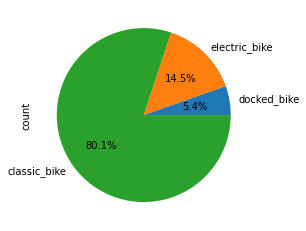

In [16]:
e.plot.pie(y='count',legend=False,autopct='%1.1f%%')

In [17]:
f=df2.groupBy("rideable_type").count().toPandas()
f.set_index('rideable_type', inplace=True)

<AxesSubplot:ylabel='count'>

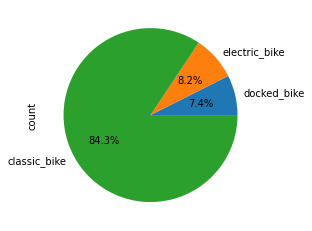

In [18]:
f.plot.pie(y='count',legend=False,autopct='%1.1f%%')